In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from pandas import Series,DataFrame
import datetime

C:\Users\trinkesh\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#load yahoo finance dataset
start  = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,10,11)
df  = web.DataReader('AAPL','yahoo',start,end)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.503574
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,116.500000
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,113.160004
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,115.080002
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.970001
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.970001


In [5]:
df.shape

(2713, 6)

Exploring Rolling Mean and Return Rate of Stocks
In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.

Rolling Mean (Moving Average) — to determine trend
Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

In [6]:
close = df["Adj Close"]
close
movingavg = close.rolling(window = 100).mean()
movingavg

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2020-10-05    100.898996
2020-10-06    101.258138
2020-10-07    101.641048
2020-10-08    102.004765
2020-10-09    102.393024
Name: Adj Close, Length: 2713, dtype: float64

In [7]:
from matplotlib import style
import matplotlib as mpl


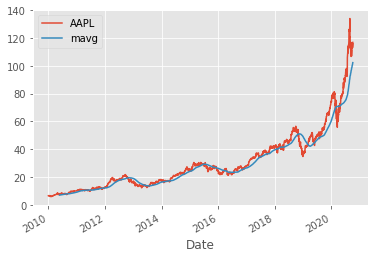

In [8]:
style.use('ggplot')
close.plot(label = 'AAPL')
movingavg.plot(label = 'mavg')
plt.legend()

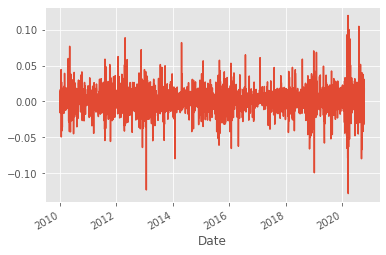

In [9]:
rate =  close/close.shift(1) - 1
rate.plot(label  = 'return')
plt.show()

# Analysing comepeters stock
we are going to analyse on how one company performs in relative with its competitor. Let’s assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [10]:
dfcomp = web.DataReader(['AAPL','GOOG',"GE",'IBM','MSFT'],'yahoo',start = start,end = end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GOOG,GE,IBM,MSFT
Date,,,,,
2009-12-31,6.503574,308.832428,10.493408,92.406113,23.801456
2010-01-04,6.604801,312.204773,10.715343,93.500313,24.168472
2010-01-05,6.616219,310.829926,10.770829,92.370834,24.176279
2010-01-06,6.510980,302.994293,10.715343,91.770790,24.027906
2010-01-07,6.498945,295.940735,11.270185,91.453102,23.778025


In [11]:
ratecomp = dfcomp.pct_change()
ratecomp.head()

Symbols,AAPL,GOOG,GE,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.010920,0.021150,0.011841,0.015420
2010-01-05,0.001729,-0.004404,0.005178,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.005152,-0.006496,-0.006137
2010-01-07,-0.001848,-0.023280,0.051780,-0.003462,-0.010400


# Correlation Analysis — Does one competitor affect others?

In [12]:
corr = ratecomp.corr()
corr.head()

Symbols,AAPL,GOOG,GE,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.529005,0.362166,0.450495,0.554768
GOOG,0.529005,1.000000,0.372425,0.472247,0.609006
GE,0.362166,0.372425,1.000000,0.516452,0.402625
IBM,0.450495,0.472247,0.516452,1.000000,0.545457
MSFT,0.554768,0.609006,0.402625,0.545457,1.000000


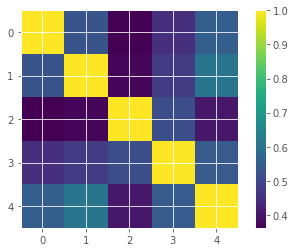

In [13]:
plt.imshow(corr ,interpolation = 'none')
plt.colorbar()

Stocks Returns Rate and Risk

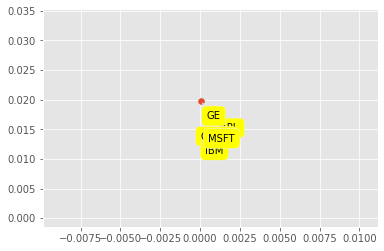

In [14]:
plt.scatter(ratecomp.mean(),ratecomp.std())
for label, x,y in zip(ratecomp.columns,ratecomp.mean(),ratecomp.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext = (20,-20),
        textcoords = 'offset points',ha = 'right',va = 'bottom',
        bbox = dict(boxstyle = 'round,pad= 0.5',fc = 'yellow'),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## India-News-Headlines file imported and doing Numerical Anaylsis

In [15]:
data = pd.read_csv(r"C:\Users\trinkesh\Downloads\headlines.csv")

In [16]:
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [17]:
data.tail()

,publish_date,headline_category,headline_text
1048570,20110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048571,20110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048572,20110207,city.patna,Central team to visit Kutku dam in Bihar
1048573,20110207,city.bhubaneswar,Red bandh evokes lukewarm response
1048574,20110207,city.bhubaneswar,De-worming drug for tribal children


datas shape (1048575, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1048575 non-null  int64 
 1   headline_category  1048575 non-null  object
 2   headline_text      1048575 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB
None 

       publish_date
count  1.048575e+06
mean   2.006565e+07
std    3.057777e+04
min    2.001010e+07
25%    2.003121e+07
50%    2.007122e+07
75%    2.009080e+07
max    2.011021e+07 

publish_date         0
headline_category    0
headline_text        0
dtype: int64 

AxesSubplot(0.125,0.125;0.62x0.755)
there are no null values


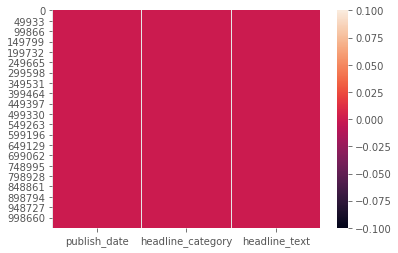

In [18]:
print("datas shape",data.shape)
print(data.info(),"\n")
print(data.describe(),"\n")
print(data.isnull().sum(),"\n")
print(sns.heatmap(data.isnull()))
print("there are no null values")

In [19]:
print(data.headline_category.value_counts(),"\n")
print("name of unique values in headline category",data.headline_category.unique())
print("tottal of unique values \n",data.headline_category.nunique())

india                                        143710
unknown                                      134195
business.india-business                       50144
city.delhi                                    46247
city.mumbai                                   42581
                                              ...  
entertainment.beauty-pageants.news                1
sports.nba                                        1
tech.more-gadgets                                 1
life-style.books.features                         1
sports.cricket.west-indies-in-new-zealand         1
Name: headline_category, Length: 397, dtype: int64 

name of unique values in headline category ['sports.wwe' 'unknown' 'entertainment.hindi.bollywood' 'india'
 'city.bengaluru' 'city.patna' 'business.india-business'
 'entertainment.english.hollywood' 'city.delhi' 'edit-page'
 'sports.cricket.india-domestic.ranji-trophy' 'sports.football'
 'only-in-america' 'city.ahmedabad' 'jugular-vein' 'swaminomics'
 'city.thiruvananthapu

 397


In [20]:
from datetime import datetime

In [21]:
data["publish_date"] = pd.to_datetime(data['publish_date'], format='%Y%m%d')

In [22]:
data.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [23]:
from nltk.corpus import stopwords
st = stopwords.words("english")

In [24]:
print(st)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
data["headline_text"] = data["headline_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (st)]))

In [26]:
data["headline_text"]

0          win cena satisfying defeating undertaker bigge...
1                Status quo disturbed Ayodhya; says Vajpayee
2                                Fissures Hurriyat Pak visit
3                          America's unwanted heading India?
4                               For bigwigs; destination Goa
                                 ...                        
1048570    Banned trio summoned Pakistan govt fixing scandal
1048571    Nadal pips Messi bag Laureus 'World Sportsman ...
1048572                   Central team visit Kutku dam Bihar
1048573                   Red bandh evokes lukewarm response
1048574                      De-worming drug tribal children
Name: headline_text, Length: 1048575, dtype: object

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["headline_text"] = data["headline_text"].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [29]:
data["headline_text"]

0          win cena satisfi defeat undertak bigger roman ...
1                     statu quo disturb ayodhya; say vajpaye
2                                  fissur hurriyat pak visit
3                                america' unwant head india?
4                                    for bigwigs; destin goa
                                 ...                        
1048570            ban trio summon pakistan govt fix scandal
1048571    nadal pip messi bag laureu 'world sportsman year'
1048572                   central team visit kutku dam bihar
1048573                      red bandh evok lukewarm respons
1048574                         de-worm drug tribal children
Name: headline_text, Length: 1048575, dtype: object

In [30]:
data["headline_text"] = data["headline_text"].apply(lambda x: ' '.join(x.lower() for word in x.split()))

In [31]:
data["headline_text"]

0          win cena satisfi defeat undertak bigger roman ...
1          statu quo disturb ayodhya; say vajpaye statu q...
2          fissur hurriyat pak visit fissur hurriyat pak ...
3          america' unwant head india? america' unwant he...
4          for bigwigs; destin goa for bigwigs; destin go...
                                 ...                        
1048570    ban trio summon pakistan govt fix scandal ban ...
1048571    nadal pip messi bag laureu 'world sportsman ye...
1048572    central team visit kutku dam bihar central tea...
1048573    red bandh evok lukewarm respons red bandh evok...
1048574    de-worm drug tribal children de-worm drug trib...
Name: headline_text, Length: 1048575, dtype: object

The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [32]:
data["headline_text"].str.replace('[^\w\s]','')

0          win cena satisfi defeat undertak bigger roman ...
1          statu quo disturb ayodhya say vajpaye statu qu...
2          fissur hurriyat pak visit fissur hurriyat pak ...
3          america unwant head india america unwant head ...
4          for bigwigs destin goa for bigwigs destin goa ...
                                 ...                        
1048570    ban trio summon pakistan govt fix scandal ban ...
1048571    nadal pip messi bag laureu world sportsman yea...
1048572    central team visit kutku dam bihar central tea...
1048573    red bandh evok lukewarm respons red bandh evok...
1048574    deworm drug tribal children deworm drug tribal...
Name: headline_text, Length: 1048575, dtype: object

In [33]:
data.head(5)

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,unknown,statu quo disturb ayodhya; say vajpaye statu q...
2,2001-01-02,unknown,fissur hurriyat pak visit fissur hurriyat pak ...
3,2001-01-02,unknown,america' unwant head india? america' unwant he...
4,2001-01-02,unknown,for bigwigs; destin goa for bigwigs; destin go...


In [34]:
data.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [35]:
data["headline_category"].value_counts()

india                                        143710
unknown                                      134195
business.india-business                       50144
city.delhi                                    46247
city.mumbai                                   42581
                                              ...  
entertainment.beauty-pageants.news                1
sports.nba                                        1
tech.more-gadgets                                 1
life-style.books.features                         1
sports.cricket.west-indies-in-new-zealand         1
Name: headline_category, Length: 397, dtype: int64

In [36]:
data["headline_text"].value_counts()

sacr space sacr space                                                                                                                                                                                                                  52
in pics: the week gone in pics: the week gone in pics: the week gone in pics: the week gone in pics: the week gone                                                                                                                     49
youngest user fair cream youngest user fair cream youngest user fair cream youngest user fair cream                                                                                                                                    48
citi round citi round                                                                                                                                                                                                                  45
it' new kind 'rat'h race it' new kind 'rat'h race it' new kind '

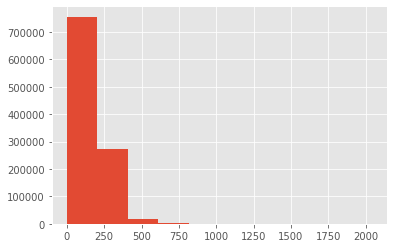

In [37]:
data["headline_text"].str.len().hist()

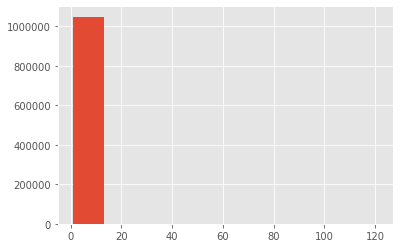

In [38]:
data["headline_text"].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x: np.mean(x)).hist()
plt.show()

In [39]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trinkesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import collections
print(collections)

<module 'collections' from 'C:\\Users\\trinkesh\\anaconda3\\lib\\collections\\__init__.py'>


In [46]:
corpus = []
new = data["headline_text"].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict

dic  =  defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        

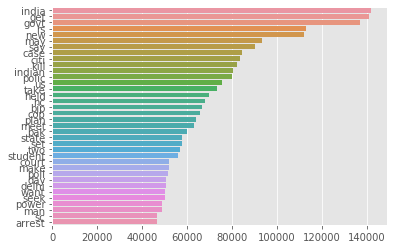

<Figure size 720x720 with 0 Axes>

In [68]:
from collections import Counter
counter = Counter(corpus)
most = counter.most_common()
x,y = [],[]
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x = y,y =x)
plt.figure(figsize = (10,10))
plt.show()            

# TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [57]:
#textblob
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

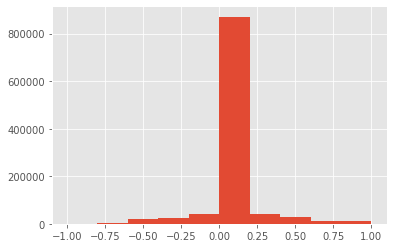

In [59]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

data["polarity_score"] = data["headline_text"].\
    apply(lambda x: polarity(x))
data["polarity_score"].hist()
plt.show()

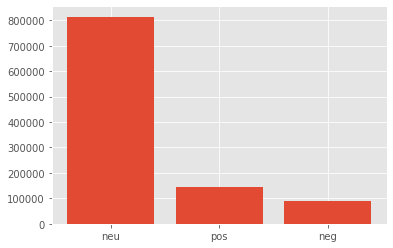

In [60]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
data["polarity"] = data["polarity_score"].\
   map(lambda x:sentiment(x))
plt.bar(data.polarity.value_counts().index,data.polarity.value_counts())
plt.show()

Yep, 70 % of news is neutral with only 18% of positive and 11% of negative. Let’s take a look at some of the positive and negative headlines.


In [62]:
data[data["polarity"]=='pos']["headline_text"].head()

0     win cena satisfi defeat undertak bigger roman ...
5     extra buse clear tourist traffic extra buse cl...
31    extra buse clear tourist traffic extra buse cl...
54    hal approach super jumbo project hal approach ...
60    the best music year the best music year the be...
Name: headline_text, dtype: object

In [63]:
data[data["polarity"]=='neg']["headline_text"].head()

87     powerless north india grope dark powerless nor...
112    con game catwalk con game catwalk con game cat...
115    flat tyres; flat music famou face flat tyres; ...
132    net lottery: a winner sucker? net lottery: a w...
139    a museum far mad crowd a museum far mad crowd ...
Name: headline_text, dtype: object